In [9]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

In [14]:
jsondir = "../results/TissueClean/angiosperm"
# models = ["SVC", "RF", "MLP", "KNN", "HGB"]
models = ["KNN"]
metrics = ["accuracy", "precision", "recall", "f1_score", "confusion_matrix"]

conf_mats = dict()
model_dfs = dict()
for m in models:
    conf_mats[m] = dict()
    jsonfname = f"{jsondir}/{m}_performance.json"
    with open(jsonfname, "r") as fp:
        perfdict = json.load(fp)

    conf_mats[m]['arabidopsis'] = perfdict['arabidopsis']["confusion_matrix"]
    conf_mats[m]['angiosperm'] = perfdict['angiosperm']["confusion_matrix"]
    del perfdict['arabidopsis']["confusion_matrix"]
    del perfdict['angiosperm']["confusion_matrix"]

print(perfdict['arabidopsis'])
print(perfdict['angiosperm'])

{'accuracy': 0.9752789699570815, 'precision': 0.975516907004961, 'recall': 0.9752789699570815, 'f1_score': 0.9749795880550803}
{'accuracy': 0.523399475851741, 'precision': 0.5159430101128336, 'recall': 0.523399475851741, 'f1_score': 0.4902029983196198}


In [18]:
print(perfdict['class_names'])

['Other', 'Root', 'WholePlant', 'Seedling', 'Seed', 'Shoot', 'Leaf', 'Flower', 'Inflorescence', 'Stigma', 'Internode', 'Hypotocyl', 'Cotyledon', 'Vasculature', 'Petal', 'Anther', 'Carpel', 'Root cell', 'Sepal', 'Petiole', 'Stamen', 'Pistil', 'Reproductive- Other']


In [19]:
cmat = np.asarray(conf_mats['KNN']['angiosperm'])
cmat.shape

(18, 18)

In [15]:
cm_angio = ConfusionMatrixDisplay(np.asarray(conf_mats['KNN']['angiosperm']),
                                  display_labels=['Other', 'Root', 'WholePlant', 'Seedling', 'Seed', 'Shoot', 'Leaf', 'Flower', 'Inflorescence', 'Stigma', 'Internode', 'Hypotocyl', 'Cotyledon', 'Vasculature', 'Petal', 'Anther', 'Carpel', 'Root cell', 'Sepal', 'Petiole', 'Stamen', 'Pistil', 'Reproductive- Other'])
cm_arabi = ConfusionMatrixDisplay(np.asarray(conf_mats['KNN']['arabidopsis']),
                                  display_labels=['Other', 'Root', 'WholePlant', 'Seedling', 'Seed', 'Shoot', 'Leaf', 'Flower', 'Inflorescence', 'Stigma', 'Internode', 'Hypotocyl', 'Cotyledon', 'Vasculature', 'Petal', 'Anther', 'Carpel', 'Root cell', 'Sepal', 'Petiole', 'Stamen', 'Pistil', 'Reproductive- Other'])

ValueError: The number of FixedLocator locations (18), usually from a call to set_ticks, does not match the number of ticklabels (23).

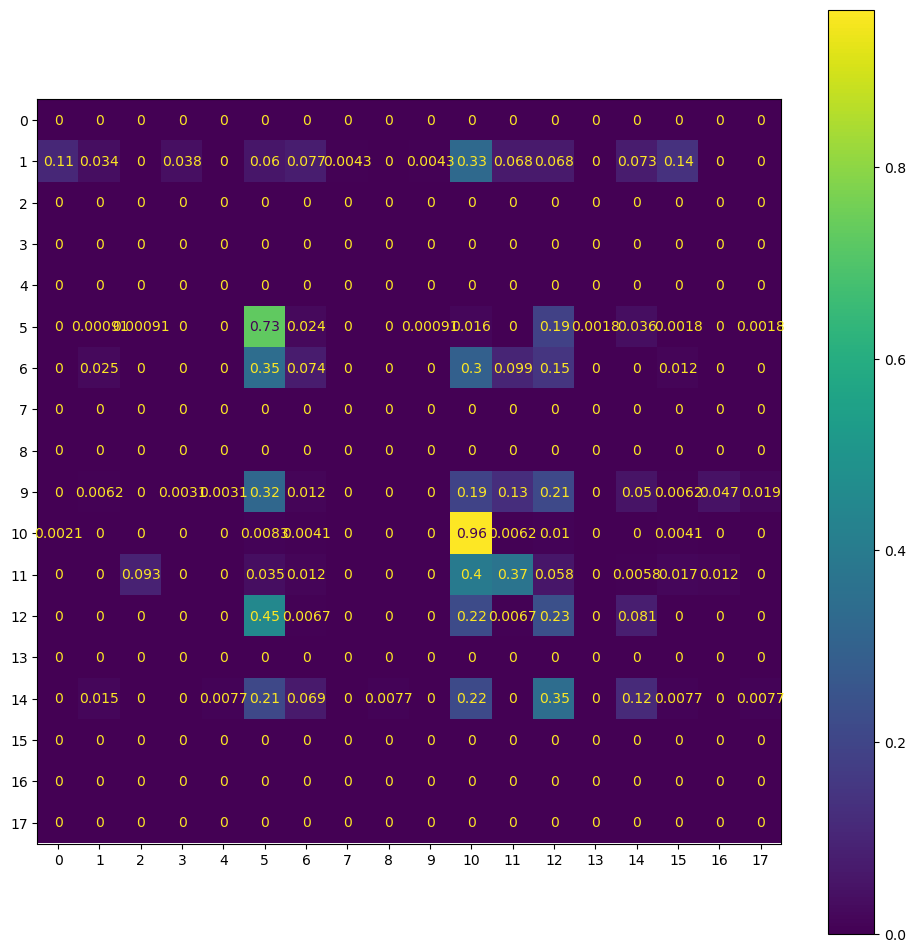

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
cm_angio.plot(ax=axs)

In [ ]:
8    'Other',
13    'Root',
22    'WholePlant',
16    'Seedling',
15    'Seed',
18    'Shoot',
7    'Leaf',
3    'Flower',
5    'Inflorescence',
20    'Stigma',
6    'Internode',
4    'Hypotocyl',
2    'Cotyledon',
21    'Vasculature',
9    'Petal',
0    'Anther',
1    'Carpel',
14    'Root cell',
17    'Sepal',
10    'Petiole',
19    'Stamen',
11    'Pistil',
12    'Reproductive- Other'


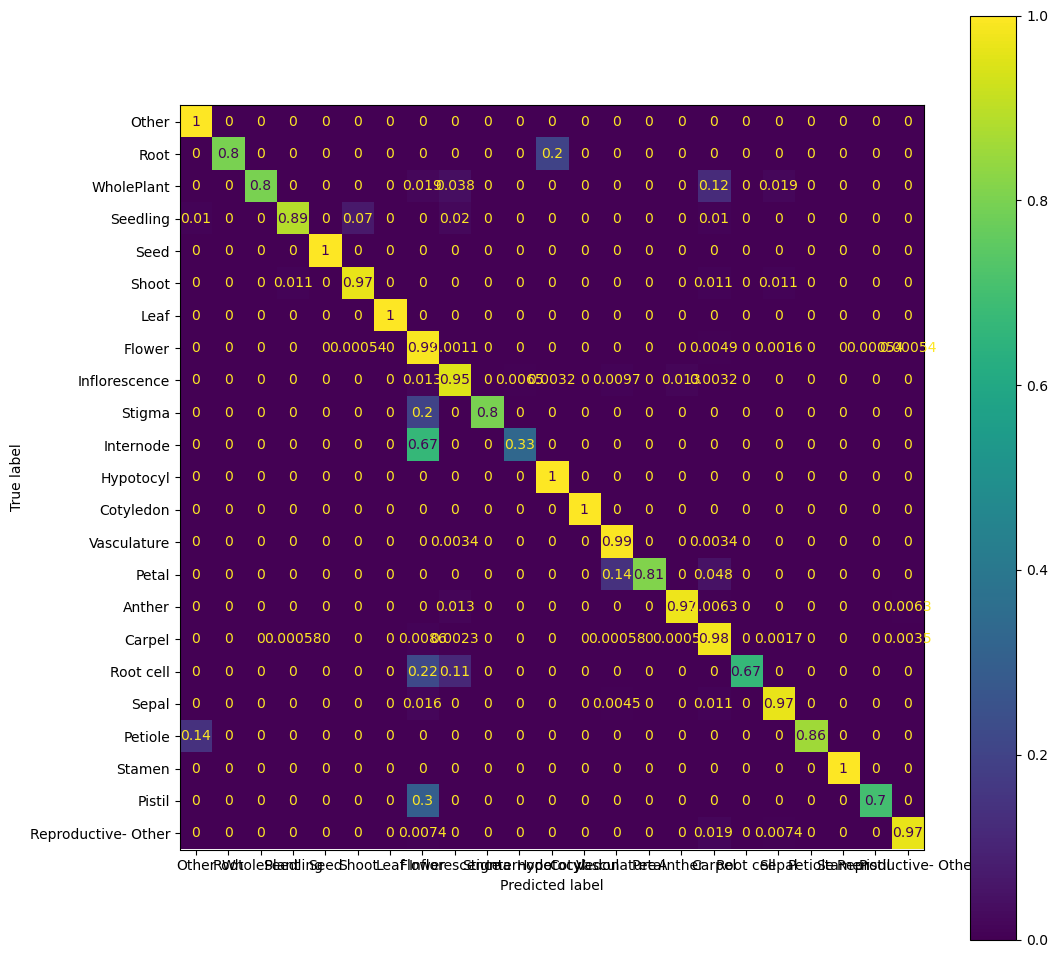

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
cm_arabi.plot(ax=axs)

In [ ]:
# jsondir2 = "../results/TissueClean/angiosperm"
# conf_mats2 = dict()
# model_dfs2 = dict()
# for m in models:
#     jsonfname = f"{jsondir2}/{m}_performance.json"
#     with open(jsonfname, "r") as fp:
#         perfdict = json.load(fp)

#     conf_mats2[m] = perfdict["confusion_matrix"]
#     del perfdict["confusion_matrix"]
#     model_dfs2[m] = perfdict

# df = pd.DataFrame(model_dfs2)
# print(df)
